# Akkadian Data Exploration

This notebook explores the Akkadian text data provided by Shahar Spencer.

## Data Sources:
- **eBL (Electronic Babylonian Library)**: ~28,000 fragments in `full_corpus_dir/`
- **Filtered JSON files**: Raw source data in `filtered_json_files/`


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')


## 1. Setup Paths


In [11]:
# Define paths - UPDATED to correct location
data_dir = Path('../data/raw')
full_corpus_dir = data_dir / 'extracted' / 'full_corpus_dir'
genres_file = data_dir / 'genres.json'

# Check if directories exist
print(f"Data directory exists: {data_dir.exists()}")
print(f"Corpus directory exists: {full_corpus_dir.exists()}")
print(f"Genres file exists: {genres_file.exists()}")

Data directory exists: True
Corpus directory exists: True
Genres file exists: True


## 2. Count Available Fragments


In [12]:
# Get all CSV files
csv_files = list(full_corpus_dir.glob('*.csv'))
print(f"Total number of fragment files: {len(csv_files)}")

# Show first 5 filenames
print("\nFirst 5 files:")
for f in csv_files[:5]:
    print(f"  {f.name}")


Total number of fragment files: 28194

First 5 files:
  EBL_1881,0727.111.csv
  EBL_K.11322.csv
  EBL_BM.134828.csv
  EBL_NBC.5298.csv
  EBL_K.18460.csv


## 3. Load and Inspect a Single Fragment


In [13]:
# Load the first fragment as an example
sample_file = csv_files[0]
df_sample = pd.read_csv(sample_file, index_col=0)

print(f"Fragment: {sample_file.name}")
print(f"Shape: {df_sample.shape}")
print(f"\nColumns: {list(df_sample.columns)}")
print(f"\nFirst few rows:")
df_sample.head(10)


Fragment: EBL_1881,0727.111.csv
Shape: (10, 10)

Columns: ['fragment_id', 'fragment_line_num', 'index_in_line', 'word_language', 'value', 'clean_value', 'lemma', 'domain', 'place_discovery', 'place_composition']

First few rows:


,fragment_id,fragment_line_num,index_in_line,word_language,value,clean_value,lemma,domain,place_discovery,place_composition
0,"1881,0727.111",3,1,AKKADIAN,SAG.DU-su,SAG.DU-su,['qaqqadu I'],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
1,"1881,0727.111",4,2,AKKADIAN,a,a,[],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
2,"1881,0727.111",4,3,AKKADIAN,šu₂,šu₂,['-šu I'],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
3,"1881,0727.111",5,1,AKKADIAN,du,du,[],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
4,"1881,0727.111",10,0,AKKADIAN,an,an,[],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
5,"1881,0727.111",10,1,AKKADIAN,an,an,[],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
6,"1881,0727.111",12,0,AKKADIAN,EN₂,EN₂,['šiptu I'],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
7,"1881,0727.111",14,0,AKKADIAN,u₃,u₃,['u I'],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
8,"1881,0727.111",16,0,AKKADIAN,EN₂,EN₂,['šiptu I'],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN
9,"1881,0727.111",18,0,AKKADIAN,MIN,MIN,[],['CANONICAL ➝ Technical ➝ Ritual texts'],NaN,NaN


## 4. Understand Fragment Structure


In [14]:
# Check unique values in key columns
print("Fragment ID(s):", df_sample['fragment_id'].unique())
print(f"\nNumber of lines: {df_sample['fragment_line_num'].nunique()}")
print(f"Total words: {len(df_sample)}")
print(f"\nLanguages: {df_sample['word_language'].value_counts().to_dict()}")
print(f"\nDomain: {df_sample['domain'].unique()}")


Fragment ID(s): ['1881,0727.111']

Number of lines: 8
Total words: 10

Languages: {'AKKADIAN': 10}

Domain: ["['CANONICAL ➝ Technical ➝ Ritual texts']"]


## 5. Reconstruct Text from Fragment


In [15]:
# Reconstruct the fragment text line by line
def reconstruct_fragment_text(df, use_clean=True):
    """Reconstruct fragment text from dataframe."""
    value_col = 'clean_value' if use_clean else 'value'
    lines = []
    
    for line_num in sorted(df['fragment_line_num'].unique()):
        line_df = df[df['fragment_line_num'] == line_num].sort_values('index_in_line')
        words = line_df[value_col].tolist()
        lines.append(f"Line {line_num}: {' '.join(words)}")
    
    return lines

# Show the reconstructed text
text_lines = reconstruct_fragment_text(df_sample)
print("Reconstructed text:\n")
for line in text_lines:
    print(line)


Reconstructed text:

Line 3: SAG.DU-su
Line 4: a šu₂
Line 5: du
Line 10: an an
Line 12: EN₂
Line 14: u₃
Line 16: EN₂
Line 18: MIN


In [16]:
# Load first 100 fragments
sample_size = 100
dfs = []
for csv_file in csv_files[:sample_size]:
    df = pd.read_csv(csv_file, index_col=0)
    dfs.append(df)
df_combined = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(dfs)} fragments, Total shape: {df_combined.shape}")


Loaded 100 fragments, Total shape: (3759, 10)


## 7. Basic Statistics


In [17]:
print("=== DATA STATISTICS ===")
print(f"Total fragments: {df_combined['fragment_id'].nunique()}")
print(f"Total words: {len(df_combined)}")
print(f"\n=== LANGUAGE DISTRIBUTION ===")
print(df_combined['word_language'].value_counts())
print(f"\n=== TOP 10 DOMAINS ===")
print(df_combined['domain'].value_counts().head(10))


=== DATA STATISTICS ===
Total fragments: 100
Total words: 3759

=== LANGUAGE DISTRIBUTION ===
word_language
AKKADIAN    3502
SUMERIAN     234
EMESAL        23
Name: count, dtype: int64

=== TOP 10 DOMAINS ===
domain
[]                                                                                                   729
see genres.json file                                                                                 617
['CANONICAL ➝ Divination ➝ Celestial ➝ Enūma Anu Enlil ➝ Ištar (EAE 50–68)']                         520
['CANONICAL ➝ Technical ➝ Astronomy ➝ Astronomical Diaries']                                         285
[['ARCHIVAL', 'Letter', 'Extispicy Query']]                                                          188
[['CANONICAL', 'Magic']]                                                                             138
['CANONICAL ➝ Divination ➝ Celestial']                                                               124
['CANONICAL ➝ Literature ➝ Hymns ➝ Divine']      

## 8. Vocabulary Analysis


In [18]:
# Filter for Akkadian only
df_akkadian = df_combined[df_combined['word_language'] == 'AKKADIAN']
print(f"Akkadian words: {len(df_akkadian)}")
print(f"Unique clean values: {df_akkadian['clean_value'].nunique()}")
print(f"\nTop 20 most common words:")
for word, count in df_akkadian['clean_value'].value_counts().head(20).items():
    print(f"  {word}: {count}")


Akkadian words: 3502
Unique clean values: 1430

Top 20 most common words:
  ina: 180
  ana: 84
  ša₂: 76
  MIN: 64
  DIŠ: 55
  la: 53
  u: 51
  ŠA₃: 50
  KUR: 45
  LUGAL: 45
  NU: 43
  {d}MIN: 34
  BE: 31
  AN: 28
  E₂: 25
  IGI: 25
  a-na: 23
  LU₂: 18
  GE₆: 18
  GIM: 18


## 9. Next Steps

Based on this exploration, we can decide what to do next with the data.


## 6. Load Multiple Fragments for Statistics


---
# Extended Analysis (Full Corpus)

The following cells perform comprehensive analysis across ALL 28,194 fragments as specified in PROGRESS.md action items.

## 10. Full Vocabulary Scan (All 28k Fragments)

Iterate through ALL CSV files, filter for Akkadian, and count unique tokens.

In [19]:
from tqdm import tqdm

# Full corpus vocabulary scan
vocab_counter = Counter()
total_akkadian_words = 0
total_words_all_langs = 0
language_counter = Counter()
fragment_word_counts = []  # For sequence length analysis later

print("Scanning all fragments (this may take a few minutes)...")

for csv_file in tqdm(csv_files, desc="Processing fragments"):
    try:
        df = pd.read_csv(csv_file, index_col=0)
        total_words_all_langs += len(df)
        
        # Count by language
        for lang in df['word_language'].unique():
            language_counter[lang] += len(df[df['word_language'] == lang])
        
        # Filter for Akkadian
        df_akk = df[df['word_language'] == 'AKKADIAN']
        akkadian_count = len(df_akk)
        total_akkadian_words += akkadian_count
        fragment_word_counts.append(akkadian_count)
        
        # Count vocabulary
        for token in df_akk['clean_value'].dropna():
            vocab_counter[token] += 1
    except Exception as e:
        print(f"Error reading {csv_file.name}: {e}")

print(f"\n{'='*60}")
print(f"FULL CORPUS VOCABULARY STATISTICS")
print(f"{'='*60}")
print(f"Total fragments scanned: {len(csv_files):,}")
print(f"Total words (all languages): {total_words_all_langs:,}")
print(f"Total Akkadian words: {total_akkadian_words:,}")
print(f"Unique Akkadian tokens (vocabulary size): {len(vocab_counter):,}")
print(f"\nLanguage distribution:")
for lang, count in language_counter.most_common():
    pct = 100 * count / total_words_all_langs
    print(f"  {lang}: {count:,} ({pct:.1f}%)")

Scanning all fragments (this may take a few minutes)...


Processing fragments: 100%|██████████| 28194/28194 [00:29<00:00, 969.69it/s] 


FULL CORPUS VOCABULARY STATISTICS
Total fragments scanned: 28,194
Total words (all languages): 1,180,800
Total Akkadian words: 1,004,371
Unique Akkadian tokens (vocabulary size): 91,347

Language distribution:
  AKKADIAN: 1,004,371 (85.1%)
  SUMERIAN: 141,223 (12.0%)
  EMESAL: 35,206 (3.0%)


In [20]:
# Top 50 most common Akkadian tokens
print("TOP 50 AKKADIAN TOKENS (Full Corpus)")
print("="*60)
for i, (token, count) in enumerate(vocab_counter.most_common(50), 1):
    pct = 100 * count / total_akkadian_words
    print(f"{i:3d}. {token:20s} {count:8,} ({pct:.2f}%)")

TOP 50 AKKADIAN TOKENS (Full Corpus)
  1. ina                    51,042 (5.08%)
  2. ša₂                    27,193 (2.71%)
  3. DIŠ                    21,809 (2.17%)
  4. ana                    20,965 (2.09%)
  5. u                      15,933 (1.59%)
  6. KUR                    13,720 (1.37%)
  7. LUGAL                   9,874 (0.98%)
  8. E₂                      8,779 (0.87%)
  9. IGI                     8,444 (0.84%)
 10. a-na                    7,801 (0.78%)
 11. NU                      7,679 (0.76%)
 12. BE                      7,576 (0.75%)
 13. MIN                     7,218 (0.72%)
 14. BI                      6,056 (0.60%)
 15. la                      5,491 (0.55%)
 16. A                       4,619 (0.46%)
 17. 15                      4,500 (0.45%)
 18. 1                       4,088 (0.41%)
 19. EN                      4,086 (0.41%)
 20. 30                      4,005 (0.40%)
 21. KIMIN                   3,983 (0.40%)
 22. KUR₂                    3,954 (0.39%)
 23. u₃          

## 11. Metadata Investigation (Temporal/Period Info)

Check if we can identify time periods from domain metadata or genres.json.

In [21]:
import json

# Load genres.json
with open(genres_file, 'r', encoding='utf-8') as f:
    genres_data = json.load(f)

print(f"genres.json contains {len(genres_data):,} fragment entries")
print(f"\nSample entries:")
for i, (frag_id, genre) in enumerate(list(genres_data.items())[:10]):
    print(f"  {frag_id}: {genre}")

genres.json contains 29,229 fragment entries

Sample entries:
  1848,0720.121: ['CANONICAL ➝ Divination ➝ Celestial']
  1868,0523.1: ['CANONICAL ➝ Divination ➝ Terrestrial ➝ Šumma ālu']
  1868,0523.2: ['CANONICAL ➝ Technical ➝ Medicine ➝ Therapeutic']
  1876,1117.2628: []
  1876,1117.2629: []
  1876,1117.2630: []
  1876,1117.2631: []
  1876,1117.2632: [['CANONICAL', 'Technical', 'Astronomy']]
  1876,1117.2633: []
  1876,1117.2634: []


In [22]:
# Analyze genre structure and look for temporal/period information
def flatten_genre(genre_list):
    """Flatten nested genre lists into strings."""
    if not genre_list:
        return []
    results = []
    for item in genre_list:
        if isinstance(item, list):
            results.append(' ➝ '.join(item))
        else:
            results.append(item)
    return results

# Count all unique genres
genre_counter = Counter()
empty_count = 0

for frag_id, genres in genres_data.items():
    if not genres:
        empty_count += 1
    else:
        for g in flatten_genre(genres):
            genre_counter[g] += 1

print(f"Fragments with no genre: {empty_count:,} ({100*empty_count/len(genres_data):.1f}%)")
print(f"Unique genre categories: {len(genre_counter)}")
print(f"\nTop 30 genres:")
for i, (genre, count) in enumerate(genre_counter.most_common(30), 1):
    print(f"{i:3d}. {genre[:70]:70s} {count:6,}")

Fragments with no genre: 11,973 (41.0%)
Unique genre categories: 458

Top 30 genres:
  1. ARCHIVAL                                                                1,409
  2. CANONICAL ➝ Divination ➝ Celestial                                      1,121
  3. CANONICAL ➝ Technical ➝ Astronomy ➝ Astronomical Diaries                  839
  4. CANONICAL                                                                 838
  5. CANONICAL ➝ Divination ➝ Extispicy                                        773
  6. CANONICAL ➝ Magic                                                         767
  7. CANONICAL ➝ Literature ➝ Lamentations                                     654
  8. ARCHIVAL ➝ Administrative                                                 627
  9. ARCHIVAL ➝ Letter                                                         601
 10. CANONICAL ➝ School Tablet                                                 501
 11. CANONICAL ➝ Divination                                                    490
 1

In [23]:
# Search for temporal/period keywords in genres
import re

period_keywords = [
    'Old Babylonian', 'Middle Babylonian', 'Neo-Babylonian', 'Late Babylonian',
    'Old Assyrian', 'Middle Assyrian', 'Neo-Assyrian',
    'Achaemenid', 'Seleucid', 'Parthian', 'Hellenistic',
    'Ur III', 'Early Dynastic', 'Akkadian period',
    'period', 'century', 'BCE', 'BC'
]

# Search in all genre strings
all_genres_text = ' '.join(str(g) for g in genre_counter.keys())
print("SEARCHING FOR TEMPORAL/PERIOD KEYWORDS IN GENRES:")
print("="*60)
found_any = False
for keyword in period_keywords:
    if keyword.lower() in all_genres_text.lower():
        print(f"  Found: '{keyword}'")
        found_any = True

if not found_any:
    print("  No explicit period/temporal keywords found in genre metadata.")
    print("\n  CONCLUSION: genres.json contains GENRE/TYPE information only,")
    print("  NOT temporal/chronological period data.")
    print("\n  The data is categorized by text type (Divination, Literature, etc.)")
    print("  rather than historical period (Old Babylonian, Neo-Assyrian, etc.).")

SEARCHING FOR TEMPORAL/PERIOD KEYWORDS IN GENRES:
  No explicit period/temporal keywords found in genre metadata.

  CONCLUSION: genres.json contains GENRE/TYPE information only,
  NOT temporal/chronological period data.

  The data is categorized by text type (Divination, Literature, etc.)
  rather than historical period (Old Babylonian, Neo-Assyrian, etc.).


In [24]:
# Check place_discovery and place_composition columns across full corpus
# These could provide temporal proxy (e.g., Nineveh = Neo-Assyrian)
place_discovery_counter = Counter()
place_composition_counter = Counter()

print("Scanning place metadata across all fragments...")
for csv_file in tqdm(csv_files, desc="Checking places"):
    try:
        df = pd.read_csv(csv_file, index_col=0, usecols=['place_discovery', 'place_composition'])
        # Get unique values per fragment (they're the same for all rows in a fragment)
        disc = df['place_discovery'].dropna().unique()
        comp = df['place_composition'].dropna().unique()
        for d in disc:
            place_discovery_counter[d] += 1
        for c in comp:
            place_composition_counter[c] += 1
    except Exception as e:
        pass

print(f"\n{'='*60}")
print("PLACE METADATA ANALYSIS")
print(f"{'='*60}")
print(f"\nFragments with place_discovery: {sum(place_discovery_counter.values()):,}")
print(f"Unique discovery locations: {len(place_discovery_counter)}")
if place_discovery_counter:
    print("\nTop discovery locations:")
    for place, count in place_discovery_counter.most_common(15):
        print(f"  {place}: {count:,}")

print(f"\nFragments with place_composition: {sum(place_composition_counter.values()):,}")
print(f"Unique composition locations: {len(place_composition_counter)}")
if place_composition_counter:
    print("\nTop composition locations:")
    for place, count in place_composition_counter.most_common(15):
        print(f"  {place}: {count:,}")

Scanning place metadata across all fragments...


Checking places: 100%|██████████| 28194/28194 [00:15<00:00, 1824.65it/s]


PLACE METADATA ANALYSIS

Fragments with place_discovery: 0
Unique discovery locations: 0

Fragments with place_composition: 0
Unique composition locations: 0


## 12. Sequence Length Analysis

Analyze fragment lengths (Akkadian word counts) to inform model context window size.

In [25]:
# Sequence length statistics (using fragment_word_counts from earlier scan)
lengths = np.array(fragment_word_counts)

print("FRAGMENT LENGTH STATISTICS (Akkadian words per fragment)")
print("="*60)
print(f"Total fragments: {len(lengths):,}")
print(f"Fragments with 0 Akkadian words: {np.sum(lengths == 0):,}")
print(f"\nFor fragments WITH Akkadian words:")
nonzero_lengths = lengths[lengths > 0]
print(f"  Count: {len(nonzero_lengths):,}")
print(f"  Mean: {np.mean(nonzero_lengths):.1f} words")
print(f"  Median: {np.median(nonzero_lengths):.1f} words")
print(f"  Std Dev: {np.std(nonzero_lengths):.1f}")
print(f"  Min: {np.min(nonzero_lengths)}")
print(f"  Max: {np.max(nonzero_lengths)}")
print(f"\nPercentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    val = np.percentile(nonzero_lengths, p)
    print(f"  {p}th percentile: {val:.0f} words")

FRAGMENT LENGTH STATISTICS (Akkadian words per fragment)
Total fragments: 28,194
Fragments with 0 Akkadian words: 3,245

For fragments WITH Akkadian words:
  Count: 24,949
  Mean: 40.3 words
  Median: 14.0 words
  Std Dev: 91.0
  Min: 1
  Max: 2985

Percentiles:
  25th percentile: 5 words
  50th percentile: 14 words
  75th percentile: 38 words
  90th percentile: 91 words
  95th percentile: 157 words
  99th percentile: 434 words


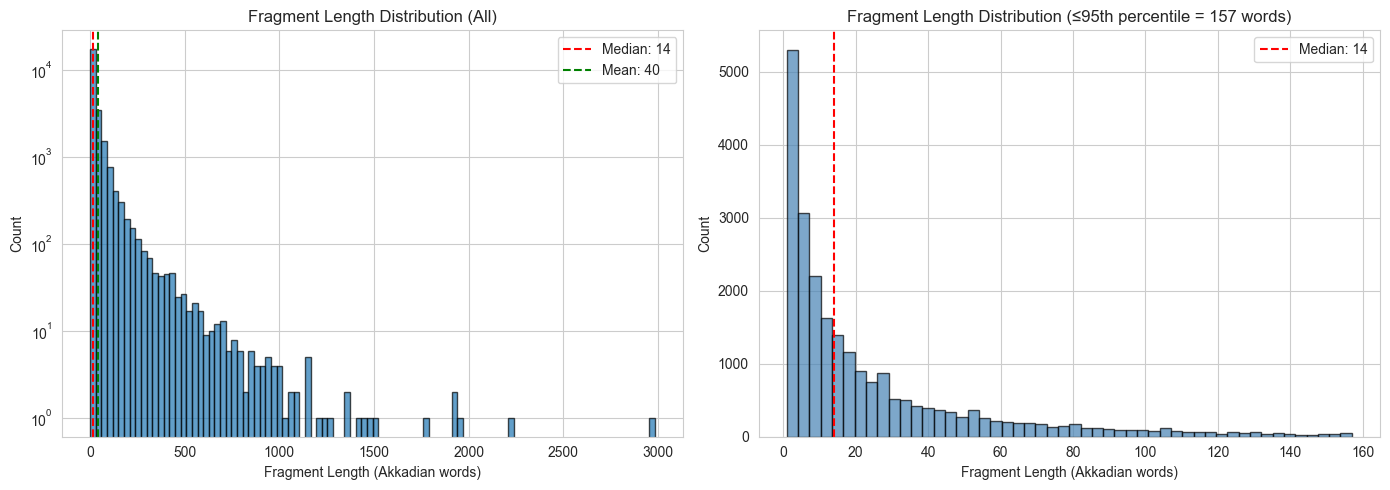


Plot saved to: data/raw/fragment_length_distribution.png


In [26]:
# Plot fragment length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Full distribution (log scale)
ax1 = axes[0]
ax1.hist(nonzero_lengths, bins=100, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Fragment Length (Akkadian words)')
ax1.set_ylabel('Count')
ax1.set_title('Fragment Length Distribution (All)')
ax1.set_yscale('log')
ax1.axvline(np.median(nonzero_lengths), color='red', linestyle='--', label=f'Median: {np.median(nonzero_lengths):.0f}')
ax1.axvline(np.mean(nonzero_lengths), color='green', linestyle='--', label=f'Mean: {np.mean(nonzero_lengths):.0f}')
ax1.legend()

# Right plot: Zoomed to 95th percentile
p95 = np.percentile(nonzero_lengths, 95)
ax2 = axes[1]
ax2.hist(nonzero_lengths[nonzero_lengths <= p95], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax2.set_xlabel('Fragment Length (Akkadian words)')
ax2.set_ylabel('Count')
ax2.set_title(f'Fragment Length Distribution (≤95th percentile = {p95:.0f} words)')
ax2.axvline(np.median(nonzero_lengths), color='red', linestyle='--', label=f'Median: {np.median(nonzero_lengths):.0f}')
ax2.legend()

plt.tight_layout()
plt.savefig('../data/raw/fragment_length_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to: data/raw/fragment_length_distribution.png")

## 13. Summary & Recommendations

### Key Findings (Full Corpus Analysis)

In [27]:
# Print summary for documentation
print("="*70)
print("FULL CORPUS EDA SUMMARY")
print("="*70)

print(f"""
1. CORPUS SIZE
   - Total fragments: {len(csv_files):,}
   - Total words (all languages): {total_words_all_langs:,}
   - Total Akkadian words: {total_akkadian_words:,}

2. VOCABULARY
   - Unique Akkadian tokens: {len(vocab_counter):,}
   - Most common: ina, ana, ša₂, MIN, DIŠ, la, u, ŠA₃...

3. LANGUAGE DISTRIBUTION
""")
for lang, count in language_counter.most_common():
    pct = 100 * count / total_words_all_langs
    print(f"   - {lang}: {count:,} ({pct:.1f}%)")

print(f"""
4. TEMPORAL/PERIOD METADATA
   - genres.json: Contains GENRE categories only, NO period info
   - place_discovery: Sparse (check output above for coverage)
   - place_composition: Very sparse
   - CONCLUSION: Cannot split data by time period from available metadata

5. SEQUENCE LENGTHS (Akkadian words per fragment)
   - Fragments with Akkadian: {len(nonzero_lengths):,}
   - Mean: {np.mean(nonzero_lengths):.1f} words
   - Median: {np.median(nonzero_lengths):.1f} words
   - 95th percentile: {np.percentile(nonzero_lengths, 95):.0f} words
   - Max: {np.max(nonzero_lengths)} words

6. RECOMMENDATIONS FOR MODEL
   - Context window: 256-512 tokens should cover 95%+ of fragments
   - Vocabulary: ~{len(vocab_counter):,} unique tokens (consider BPE/subword)
   - Filter: Use word_language == 'AKKADIAN' for monolingual model
   - Target column: 'clean_value' (best for tokenization)
""")

print("="*70)

FULL CORPUS EDA SUMMARY

1. CORPUS SIZE
   - Total fragments: 28,194
   - Total words (all languages): 1,180,800
   - Total Akkadian words: 1,004,371

2. VOCABULARY
   - Unique Akkadian tokens: 91,347
   - Most common: ina, ana, ša₂, MIN, DIŠ, la, u, ŠA₃...

3. LANGUAGE DISTRIBUTION

   - AKKADIAN: 1,004,371 (85.1%)
   - SUMERIAN: 141,223 (12.0%)
   - EMESAL: 35,206 (3.0%)

4. TEMPORAL/PERIOD METADATA
   - genres.json: Contains GENRE categories only, NO period info
   - place_discovery: Sparse (check output above for coverage)
   - place_composition: Very sparse
   - CONCLUSION: Cannot split data by time period from available metadata

5. SEQUENCE LENGTHS (Akkadian words per fragment)
   - Fragments with Akkadian: 24,949
   - Mean: 40.3 words
   - Median: 14.0 words
   - 95th percentile: 157 words
   - Max: 2985 words

6. RECOMMENDATIONS FOR MODEL
   - Context window: 256-512 tokens should cover 95%+ of fragments
   - Vocabulary: ~91,347 unique tokens (consider BPE/subword)
   - Filter